In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# Q1: Import data and check null values, column info, and descriptive statistics
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [19]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [20]:
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


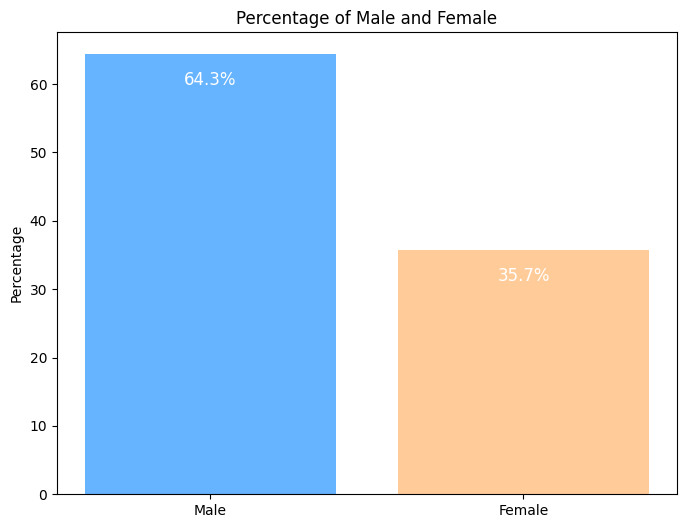

In [40]:
# Calculate the percentage of males and females
gender_counts = tips['sex'].value_counts()
gender_percentages = (gender_counts / len(tips)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index.map({1: 'Male', 0: 'Female'}), gender_percentages, color=['#66b3ff', '#ffcc99'])

# Add percentage labels inside the bars
for bar, percentage in zip(bars, gender_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{percentage:.1f}%', ha='center', va='bottom', color='white', fontsize=12)

plt.title('Percentage of Male and Female')
plt.ylabel('Percentage')
plt.show()

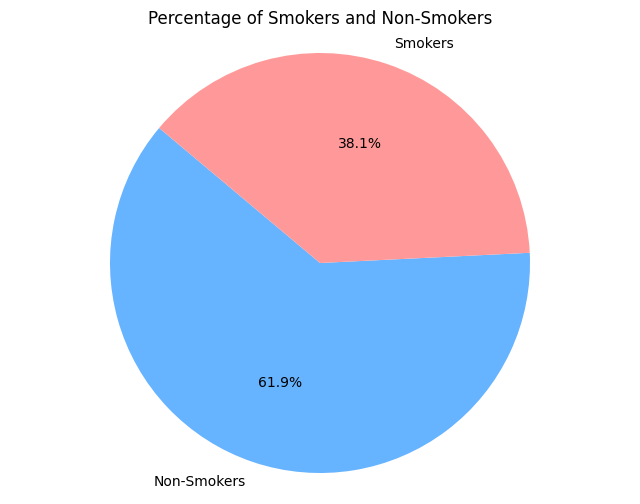

In [31]:
# Calculate the percentage of smokers and non-smokers
smoker_counts = tips['smoker'].value_counts()
smoker_percentages = (smoker_counts / len(tips)) * 100

# Create a pie chart
labels = ['Non-Smokers', 'Smokers']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(smoker_percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Smokers and Non-Smokers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [3]:
# Q2: Tips analysis by total bill paid, number of people at a table, and day of the week
print(tips.groupby('total_bill')['tip'].mean())
print(tips.groupby('size')['tip'].mean())
print(tips.groupby('day')['tip'].mean())

total_bill
3.07      1.000
5.75      1.000
7.25      3.075
7.51      2.000
7.56      1.440
          ...  
45.35     3.500
48.17     5.000
48.27     6.730
48.33     9.000
50.81    10.000
Name: tip, Length: 229, dtype: float64
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [21]:
# Q3: Tips analysis by total bill paid, number of people at a table, and gender of the person paying the bill
print(tips.groupby(['total_bill', 'sex'])['tip'].mean())
print(tips.groupby(['size', 'sex'])['tip'].mean())

total_bill  sex   
3.07        Female     1.00
5.75        Female     1.00
7.25        Female     1.00
            Male       5.15
7.51        Male       2.00
                      ...  
45.35       Male       3.50
48.17       Male       5.00
48.27       Male       6.73
48.33       Male       9.00
50.81       Male      10.00
Name: tip, Length: 235, dtype: float64
size  sex   
1     Female    1.276667
      Male      1.920000
2     Female    2.528448
      Male      2.614184
3     Female    3.250000
      Male      3.476667
4     Female    4.021111
      Male      4.172143
5     Female    5.140000
      Male      3.750000
6     Female    4.600000
      Male      5.850000
Name: tip, dtype: float64


In [22]:
# Q4: Tips analysis by total bill paid, number of people at a table, and time of the meal
print(tips.groupby(['total_bill', 'time'])['tip'].mean())
print(tips.groupby(['size', 'time'])['tip'].mean())

total_bill  time  
3.07        Dinner     1.000
5.75        Dinner     1.000
7.25        Dinner     3.075
7.51        Lunch      2.000
7.56        Lunch      1.440
                       ...  
45.35       Dinner     3.500
48.17       Dinner     5.000
48.27       Dinner     6.730
48.33       Dinner     9.000
50.81       Dinner    10.000
Name: tip, Length: 232, dtype: float64
size  time  
1     Dinner    1.000000
      Lunch     1.875000
2     Dinner    2.661923
      Lunch     2.423077
3     Dinner    3.490000
      Lunch     2.754000
4     Dinner    4.122500
      Lunch     4.218000
5     Dinner    3.785000
      Lunch     5.000000
6     Dinner    5.000000
      Lunch     5.300000
Name: tip, dtype: float64


In [6]:
# Q5: Tips analysis by day to find out which day the most tips are given
print(tips.groupby('day')['tip'].sum())

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


In [7]:
# Q6: Tips analysis by gender of the person paying the bill to see who tips the most
print(tips.groupby('sex')['tip'].mean())

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [23]:
# Q7: Tips analysis by smoker to see if smokers tip more than non-smokers
print(tips.groupby('smoker')['tip'].mean())

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


In [24]:
# Q8: Tips analysis by time of the meal to see if most tips are given during lunch or dinner
print(tips.groupby('time')['tip'].mean())

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64


In [25]:
# Q9: Data transformation - Transform categorical values into numerical values
tips['sex'] = tips['sex'].map({'Female': 0, 'Male': 1})
tips['smoker'] = tips['smoker'].map({'No': 0, 'Yes': 1})
tips['day'] = tips['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
tips['time'] = tips['time'].map({'Lunch': 0, 'Dinner': 1})

In [26]:
# Q10: Split data into training and test sets
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Q11: Train a Linear Regression model for predicting waiter tips
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Q12: Check model prediction
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6963090766605352


In [29]:
# Example input prediction
example_input = np.array([[24.50, 1, 0, 0, 1, 4]])
example_prediction = model.predict(example_input)
print(f'Predicted Tip: {example_prediction}')

Predicted Tip: [3.73742609]


C:\Users\SalmanPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
